In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for 500 rows
data = {
    "bedrooms": np.random.randint(1, 7, 500),
    "bathrooms": np.round(np.random.uniform(1, 5, 500), 1),
    "sqft_living": np.random.randint(500, 5000, 500),
    "sqft_lot": np.random.randint(1000, 15000, 500),
    "floors": np.round(np.random.choice([1.0, 1.5, 2.0, 2.5, 3.0], 500), 1),
    "waterfronts": np.random.choice([0, 1], 500, p=[0.9, 0.1]),
    "view": np.random.randint(0, 5, 500),
    "condition": np.random.randint(1, 6, 500),
    "sqft_above": np.random.randint(500, 4000, 500),
    "sqft_basement": np.random.randint(0, 1500, 500),
    "yr_built": np.random.randint(1900, 2023, 500),
    "yr_renovated": np.random.choice([0] + list(range(1930, 2023)), 500),
}

# Calculate price based on some of the features
data["price"] = (
    data["sqft_living"] * 250 +
    data["bathrooms"] * 10000 +
    data["bedrooms"] * 8000 +
    data["waterfronts"] * 50000 +
    np.random.randint(-20000, 20000, 500)
)

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
csv_path = "house_price_data.csv"
df.to_csv(csv_path, index=False)

csv_path


'house_price_data.csv'

In [11]:
dataset = pd.read_csv("house_price_data.csv")

In [12]:
dataset.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfronts,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,4,1.7,1466,9032,2.0,0,4,4,1028,1168,1944,1990,430961.0
1,5,2.7,3932,1001,2.5,0,0,2,2718,1088,1922,2015,1059320.0
2,3,2.6,1188,7368,2.0,0,3,3,750,1270,1968,1960,331340.0
3,5,3.5,4743,12040,1.5,0,0,3,2288,734,1993,1968,1275674.0
4,5,3.5,4201,13236,1.0,1,1,5,3958,990,1905,1941,1171434.0


<Axes: >

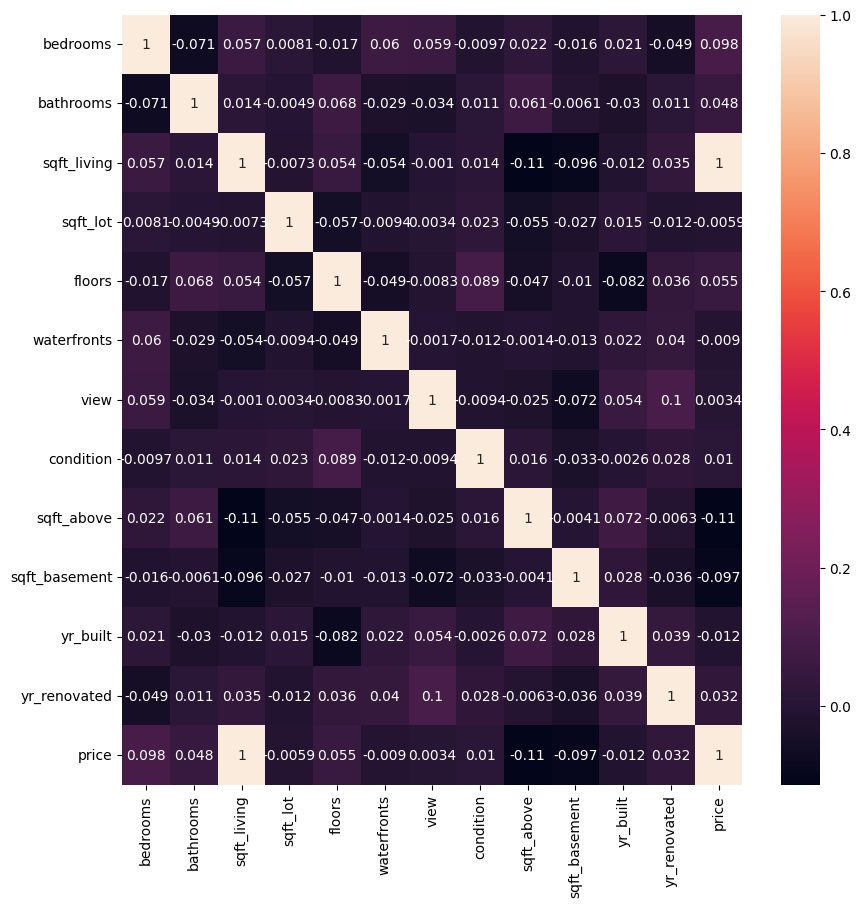

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr() , annot=True)

In [16]:
x = dataset.iloc[:,:-1]
y = dataset["price"]

In [18]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [19]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfronts,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0.290521,-1.113740,-1.003640,0.221958,-0.062036,-0.318311,1.416413,0.760894,-1.274311,0.954802,-0.473349,0.169997
1,0.871563,-0.260692,0.852182,-1.725160,0.642915,-0.318311,-1.396721,-0.627599,0.371560,0.765961,-1.088669,0.285283
2,-0.290521,-0.345996,-1.212853,-0.181479,-0.062036,-0.318311,0.713130,0.066648,-1.545052,1.195575,0.197909,0.031653
3,0.871563,0.421747,1.462512,0.951248,-0.766986,-0.318311,-1.396721,0.066648,-0.047212,-0.069664,0.897137,0.068545
4,0.871563,0.421747,1.054622,1.241219,-1.471936,3.141586,-0.693438,1.455140,1.579181,0.534630,-1.564144,-0.055965
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.290521,-0.516606,-1.285852,1.416753,-0.062036,-0.318311,1.416413,-0.627599,0.123218,1.077549,-1.256484,-0.083633
496,-0.871563,0.251137,0.316357,-1.572659,-0.766986,-0.318311,0.009846,-1.321845,1.311362,-0.074385,0.841199,0.114659
497,-0.871563,0.421747,-1.194039,0.421010,-0.062036,-0.318311,0.009846,1.455140,0.014143,-0.806146,0.589477,0.105436
498,0.871563,-1.625569,-1.026970,1.110053,-0.766986,-0.318311,1.416413,-1.321845,-0.357882,-0.454429,1.344642,0.271449


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfronts,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
249,0.290521,0.507052,0.850677,0.086428,-1.471936,-0.318311,1.416413,-0.627599,1.098080,0.374114,0.561508,-0.032907
433,0.871563,-1.199045,-0.464805,-0.647711,0.642915,3.141586,0.713130,0.760894,0.760141,-0.898206,0.449631,0.280672
19,0.290521,0.507052,0.024362,0.364276,0.642915,-0.318311,-1.396721,-1.321845,-0.209851,1.554374,0.953075,-9.006808
322,-1.452605,-1.369654,-0.997620,-0.942288,1.347865,-0.318311,0.713130,0.066648,-0.378334,1.327764,1.232766,0.248392
332,0.871563,-0.345996,0.610609,-0.863977,-0.062036,-0.318311,-0.693438,-0.627599,1.022117,-1.478894,0.365724,-0.079022
...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.290521,-0.431301,1.222444,0.934519,-0.062036,-0.318311,1.416413,-1.321845,0.016091,0.409522,-1.144607,0.183831
270,-0.290521,0.421747,1.330813,0.014178,0.642915,-0.318311,-1.396721,0.760894,-1.287945,0.636132,0.897137,-0.102079
348,-0.290521,-0.601911,-0.448248,1.252129,-1.471936,-0.318311,-1.396721,-1.321845,1.259745,1.077549,0.617446,0.239169
435,0.290521,0.762966,-1.028475,-1.413612,0.642915,3.141586,0.009846,-1.321845,-1.046421,0.289135,-0.025843,0.142328


In [23]:
from sklearn.linear_model import LinearRegression ,Lasso , Ridge

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import numpy as np

In [26]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.9986531067687198

In [34]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))

153916800.72346315
11063.638799176964


<BarContainer object of 12 artists>

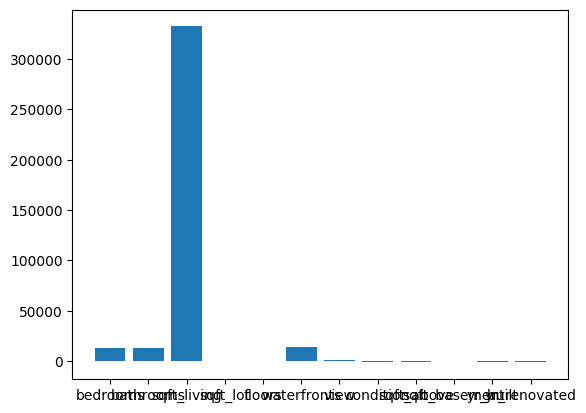

In [27]:
plt.bar(x.columns , lr.coef_)

Lasso

In [ ]:
la = Lasso(alpha=0.5)
la.fit(x_train, y_train)
la.score(x_test, y_test)

0.9986531400071592

In [35]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))

153913002.38655913
11063.512569245248


<BarContainer object of 12 artists>

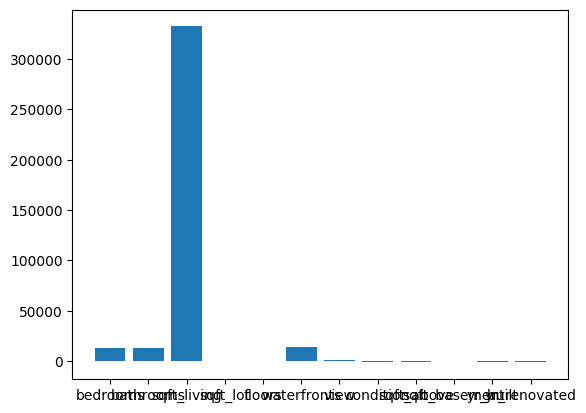

In [29]:
plt.bar(x.columns , la.coef_)

Ridge

In [30]:
ri = Ridge(alpha=10)
ri.fit(x_train, y_train)
ri.score(x_test, y_test)

0.9981688391294656

In [36]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))

209256692.55516067
12275.60603052039


<BarContainer object of 12 artists>

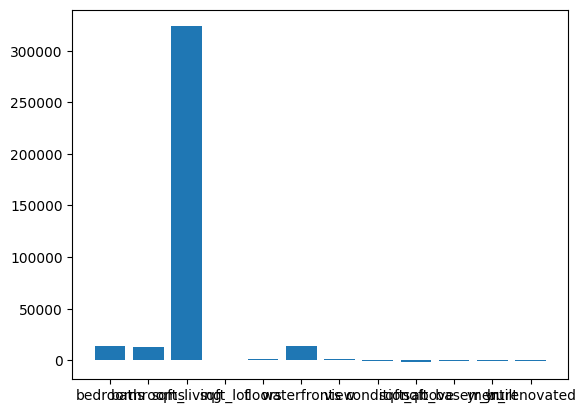

In [31]:
plt.bar(x.columns , ri.coef_)